<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement-and-datasets" data-toc-modified-id="Problem-statement-and-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement and datasets</a></span><ul class="toc-item"><li><span><a href="#Toy-datasets" data-toc-modified-id="Toy-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Toy datasets</a></span></li><li><span><a href="#Perovskite-dataset" data-toc-modified-id="Perovskite-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Perovskite dataset</a></span></li><li><span><a href="#Types-Classification-Datasets" data-toc-modified-id="Types-Classification-Datasets-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Types Classification Datasets</a></span></li><li><span><a href="#Discussion:-Which-of-the-datasets-are:" data-toc-modified-id="Discussion:-Which-of-the-datasets-are:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Discussion: Which of the datasets are:</a></span></li><li><span><a href="#General-types-of-classification-models" data-toc-modified-id="General-types-of-classification-models-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>General types of classification models</a></span><ul class="toc-item"><li><span><a href="#Discriminative-models:" data-toc-modified-id="Discriminative-models:-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Discriminative models:</a></span></li><li><span><a href="#Generative-models" data-toc-modified-id="Generative-models-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Generative models</a></span></li></ul></li></ul></li><li><span><a href="#Accuracy-metrics-and-model-validation" data-toc-modified-id="Accuracy-metrics-and-model-validation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Accuracy metrics and model validation</a></span><ul class="toc-item"><li><span><a href="#False-positives-and-false-negatives" data-toc-modified-id="False-positives-and-false-negatives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>False positives and false negatives</a></span></li><li><span><a href="#Discussion:-Consider-a-chemical-process-where-your-model-is-predicting-whether-or-not-a-reactor-is-near-runaway-conditions.-What-are-the-implications-of-a-false-positive-or-negative?" data-toc-modified-id="Discussion:-Consider-a-chemical-process-where-your-model-is-predicting-whether-or-not-a-reactor-is-near-runaway-conditions.-What-are-the-implications-of-a-false-positive-or-negative?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Discussion: Consider a chemical process where your model is predicting whether or not a reactor is near runaway conditions. What are the implications of a false positive or negative?</a></span></li><li><span><a href="#Accuracy,-Precision,-Recall,-and-F1-scores" data-toc-modified-id="Accuracy,-Precision,-Recall,-and-F1-scores-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Accuracy, Precision, Recall, and F1 scores</a></span></li><li><span><a href="#Exercise:-Plot-the-accuracy-of-the-&quot;guessing-zero&quot;-model-as-a-function-of-number-of-1's-included-in-the-actual-data" data-toc-modified-id="Exercise:-Plot-the-accuracy-of-the-&quot;guessing-zero&quot;-model-as-a-function-of-number-of-1's-included-in-the-actual-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exercise: Plot the accuracy of the "guessing zero" model as a function of number of 1's included in the actual data</a></span></li><li><span><a href="#Receiver-Operating-Characteristic-(ROC)-curves" data-toc-modified-id="Receiver-Operating-Characteristic-(ROC)-curves-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Receiver Operating Characteristic (ROC) curves</a></span></li><li><span><a href="#Confusion-matrices" data-toc-modified-id="Confusion-matrices-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Confusion matrices</a></span></li></ul></li><li><span><a href="#Cross-validation-and-Resampling" data-toc-modified-id="Cross-validation-and-Resampling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cross-validation and Resampling</a></span></li><li><span><a href="#Deriving-a-loss-function-for-discrimination" data-toc-modified-id="Deriving-a-loss-function-for-discrimination-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Deriving a loss function for discrimination</a></span></li></ul></div>

# Classification Overview

## Problem statement and datasets

A model that maps continuous or discrete inputs to a discrete (ordinal, categorical, or integer) output space. In this course we will focus primarily on problems with continuous inputs.

### Toy datasets

Since this problem type is significantly different than what we have seen before, we will introduce a few new datasets in this module. First, we will consider some "toy" datasets that can be generated using `scikit-learn`:

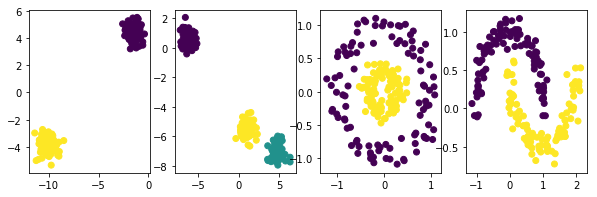

In [38]:
%matplotlib inline
import pylab as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
np.random.seed(1) #make sure the same random samples are generated each time

noisiness = 1

X_blob, y_blob = make_blobs(n_samples=200, centers=2, cluster_std=0.5*noisiness, n_features=2)

X_mc, y_mc = make_blobs(n_samples=200, centers=3, cluster_std=0.5*noisiness, n_features=2)

X_circles, y_circles = make_circles(n_samples=200, factor=0.3, noise=0.1*noisiness)

X_moons, y_moons = make_moons(n_samples=200, noise=0.1*noisiness)

fig, axes = plt.subplots(1,4, figsize=(10, 3))

all_datasets = [[X_blob, y_blob],[X_mc, y_mc], [X_circles, y_circles],[X_moons, y_moons]]

for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:,0], Xi[:,1], c=yi)
    

A few things to note:

* The "random seed" is set to 0, so these will be the same every time.

* There is a "noisiness" variable that allows us to easily add more noise to these datasets.

* The outputs, y, are approximately evenly divided between [0, 1] for 2-class datasets, or [0, 1, 2] for the 3 class dataset.

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

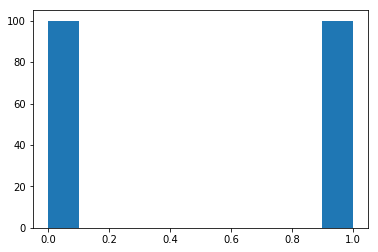

In [11]:
fig, ax = plt.subplots()
ax.hist(y_blob)

### Perovskite dataset

We will also work with a real dataset, taken from the paper "[New tolerance factor to predict the stability of perovskite oxides and halides](https://advances.sciencemag.org/content/5/2/eaav0693)" by Bartel et al. Perovskites are a very useful class of oxide materials that can have very high catalyic activities, and have recently shown promise in solar cells. However, not all combinations of elements will form a perovskite structure, and it is very useful to be able to predict whether or not an elemental composition will form a perovskite. This helps determine whether or not a material can be synthesized before going into the lab.

This dataset contains a list of chemical formulas, along with some chemical features of the elements (radius and oxidation state), and whether or not they will form a stable perovskite crystal structure:

In [34]:
import pandas as pd

df = pd.read_csv('data/perovskite_data.csv')

df.head(10)

,ABX3,A,B,X,nA,nB,nX,rA (Ang),rB (Ang),rX (Ang),t,tau,exp_label
0,AgBiO3,Ag,Bi,O,1,5,-2,1.28,0.76,1.40,0.88,4.07,-1
1,AgBrO3,Ag,Br,O,1,5,-2,1.28,0.31,1.40,1.11,6.43,-1
2,AgCaCl3,Ag,Ca,Cl,1,2,-1,1.28,1.00,1.81,0.78,6.00,-1
3,AgCdBr3,Ag,Cd,Br,1,2,-1,1.28,0.95,1.96,0.79,5.58,-1
4,AgClO3,Ag,Cl,O,1,5,-2,1.28,0.12,1.40,1.25,15.17,-1
5,AgCoF3,Ag,Co,F,1,2,-1,1.28,0.74,1.33,0.89,3.96,1
6,AgCuF3,Ag,Cu,F,1,2,-1,1.28,0.73,1.33,0.90,3.94,1
7,AgMgCl3,Ag,Mg,Cl,1,2,-1,1.28,0.72,1.81,0.86,4.60,-1
8,AgMgF3,Ag,Mg,F,1,2,-1,1.28,0.72,1.33,0.90,3.94,1
9,AgMnF3,Ag,Mn,F,1,2,-1,1.28,0.83,1.33,0.85,4.16,1


In [28]:
X_perov = df[['nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)', 't', 'tau']].values
y_perov = df['exp_label'].values

print(X_perov.shape, y_perov.shape)

(576, 8) (576,)


A few things to note on this dataset:

* We only take the continuous variables to form our feature matrix, X.

* The `A`, `B`, `X` columns determine which elements are in the structure, `nA`, `nB`, `nX` columns are the formal oxidation state of each element, and `rA`, `rB`, and `rX` columns are the radii of each element (in Angstrom).

* There are also two additional columns, `t` and `tau`, which are "derived features" that are described in the original publication.

* The outputs, y, are in [-1, 1] and are not perfectly evenly distributed.

(array([263.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 313.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

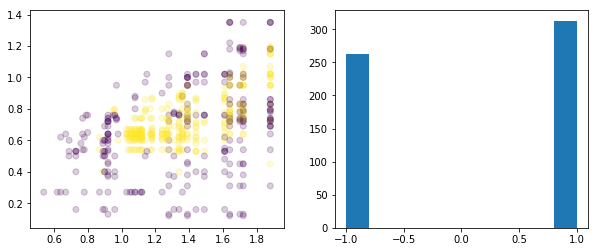

In [33]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(X_perov[:,3], X_perov[:,4], c=y_perov, alpha=0.2)
axes[1].hist(y)

### Types Classification Datasets

There are a few different things to consider when examining a classification dataset:

* **Linearly separable**: A problem where it is possible to exactly separate the classes with a straight line (or plane) in the feature space.

<center>
<img src="images/linearly_separable.png" width="500">
</center>

* **Binary vs. Multi-class**: A binary classification problem has only 2 classes, while a multi-class problem has more than 2 classes. 

There are two approaches to dealing with multi-class problems:

1) Convert multi-class problems to binary problems using a series of "one vs. the rest" binary classifiers

<center>
<img src="images/OvA.png" width="400">
</center>

2) Consider the multi-class nature of the problem when deriving the method (e.g. kNN) or determining the cost function (e.g. logistic regression)

<center>
<img src="images/multiclass_cost.png" width="400">
</center>

In the end, the difference between these approaches tend to be relatively minor, although the training procedures can be quite different. One vs. the rest is more efficient for parallel training, while multi-class objective functions are more efficient in serial.

* **Balanced vs. Imbalanced**: A balanced problem has roughly equal numbers of examples in all classes, while an imbalanced problem has an (typically significantly) higher number of examples of some classes. Strategies for overcoming class imbalance will be briefly discussed in subsequent lectures.

### Discussion: Which of the datasets are:

* Linearly separable?
* Non-linearly separable?
* Balanced?

### General types of classification models

There are two distinct types of classification models: discriminative and generative. We will focus on discriminative models, but will also discuss and see examples of generative models.

#### Discriminative models:

These models are most similar to regression. Rather than learning a line\model that best represents the data we want to learn a line\model that best separates (discriminates) between different classes. For a binary classifier we can write this as:

$f(\vec{x}) > p$ if class 1

$f(\vec{x}) < p$ if class 2

where $p$ is some constant threshold that separates the classes.

Another way to think of this is that we will establish a function that estimates the probability of a point belonging to a particular class, given its features:

$P(y_i|\vec{x}) = f(\vec{x})$

Then the classes can be discretized by establishing probability cutoffs. Conceptually, discriminative models separate classes by identifying **differences** between classes, and directly solve the problem of estimating class probability.

#### Generative models

Generative models are somewhat less intuitive, but can be very powerful. In a generative model the goal is to solve the "inverse problem" of predicting the probability of features given a class label output. Conceptually, you can think of this as identifying **similarities** between points within a given class. Mathematically:

$P(\vec{x}|y_i) = f(\vec{x})$

This is counter-intuitive, but the model can then be used in conjunction with Bayes' rule to indirectly solve the classification problem. Bayes rule is:

$P(A|B) = \frac{P(B|A) P(A)}{P(B)} \rightarrow P(y_i|\vec{x}) = \frac{P(\vec{x}|y_i) P(y_i)}{P(\vec{x})}$

The $P(y_i)$ term is available from the data (number of times each class appears) and the $P(\vec{x})$ term is a constant so it can be dropped when computing relative probabilities.

Generative models are more difficult to understand, but they have a key advantage: new synthetic data can be generated by using the function $P(\vec{x}|y_i)$. This opens the possibility of iterative training schemes that systematically improve the estimate of $P(\vec{x}|y_i)$ (e.g. Generative Artificial Neural Networks) and can also aid in diagnosing problems in models.

<br>
<center>
<img src="images/discriminative_vs_generative.png" width="800">
</center>

## Accuracy metrics and model validation

Assessing the accuracy of a classification model requires different metrics from regression. We will explore a few here.

### False positives and false negatives
Since the output of a classification problem is discrete, we can have different types of errors. In particular, there are 2 types of errors for any 2-class problem:

* False positives (Type I error): A point is classified as 1 but should be 0.
* False negative (Type II error): A point is classified as 0 but should be 1.

Note that in most problems we will work with the definition of 0 and 1 is arbitrary, so these types can be arbitrarily switched. However, they are still distinctly different kinds of failures of the model, and in some cases it can make a big difference.

### Discussion: Consider a chemical process where your model is predicting whether or not a reactor is near runaway conditions. What are the implications of a false positive or negative?

### Accuracy, Precision, Recall, and F1 scores

The accuracy, precision, and recall are 3 common metrics for evaluating 2-class models:

* Accuracy = (number correct)/(total) = (TP + TN)/(TP + TN + FP + FN)
* Precision = TP/(TP + FP)
* Recall = TP/(TP + FN)

An additional metric, the F1 score, is sometimes used to summarize precision and recall:

* F1 = (2* Precision * Recall)/(Precision + Recall)

This is the "harmonic mean" of precision and recall and ranges from 0 for a model with 0 precision or recall to 1 for a model with perfec precision and recall.

<center>
<img src="images/precision_recall.png" width="500">
</center>

We can implement this with a simple Python function:

In [64]:
def acc_prec_recall(y_model, y_actual):
    TP = np.sum(np.logical_and(y_model == y_actual, y_model == 1))
    TN = np.sum(np.logical_and(y_model == y_actual, y_model == 0))
    FP = np.sum(np.logical_and(y_model != y_actual, y_model == 1))
    FN = np.sum(np.logical_and(y_model != y_actual, y_model == 0))
    acc = (TP + TN) / (TP + TN + FP + FN)
    if TP == 0:
        prec = 0
        recall = 0
    else:
        prec = TP / (TP + FP)
        recall = TP / (TP + FN)
    return acc, prec, recall

These metrics depend strongly on the class imbalance! Let's take one of our toy datasets and create a truly bad classifier that always guesses that the class is 0. Then, we can see how the accuracy, precision, and recall of this classifier change as the imbalance shifts:

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

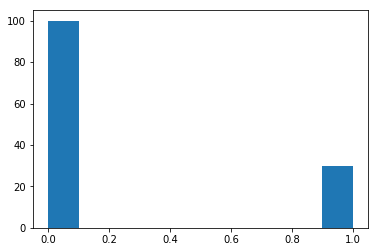

In [65]:
N_include = 30

#only include N_include examples of class 1
y_imbalanced = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        y_imbalanced.append(yi)
        Ni += 1
    elif yi == 0:
        y_imbalanced.append(yi)

y_imbalanced = np.array(y_imbalanced)
fig, ax = plt.subplots()
ax.hist(y_imbalanced)

Now we can calculate the accuracy, precision, and recall when our classifier simply guesses that every point is 0:

In [63]:
y_guess = np.zeros(len(y_imbalanced))

acc_prec_recall(y_guess, y_imbalanced)

(0.7692307692307693, 0, 0)

### Exercise: Plot the accuracy of the "guessing zero" model as a function of number of 1's included in the actual data

### Receiver Operating Characteristic (ROC) curves 

The "receiver operating characteristic", or ROC curve, is useful for models where a threshold is used to tune the rate of false positives and false negatives. The area under the curve can be used as a metric for how well the model performs.

<center>
<img src="images/ROC_curve.jpg" width="300">
</center>

We will discuss this metric more once the meaning of a "threshold" has been described.

### Confusion matrices

False positives and false negatives only apply to binary problems. The "confusion matrix" is a multi-class generalization of the concept, and can help identify which classes are "confusing" the algorithm.

<center>
<img src="images/confusion_matrix.png" width="500">
</center>

In a confusion matrix the diagonal elements correspond to true positives and true negatives, while the off-diagonal elements correspond to false postives and false negatives, with false positives above the diagonal and false negatives below (or vice versa, depending on label definitions).

## Cross-validation and Resampling

Similar to the case of regression, cross-validation is an important tool for classification models. The general idea is the same: We hide some of the data from the model when we train it, then we test the model on the hidden data.

However, there are a few wrinkles in classification that arise in the case of class imbalance.

## Deriving a loss function for discrimination